In [1]:
%matplotlib inline

from sklearn.datasets import make_blobs
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# 50 个样本，2 个中心
X, y = make_blobs(n_samples=20, centers=2, random_state=0, cluster_std=0.6)

In [3]:
X.shape
X

array([[ 1.4949318 ,  3.85848832],
       [ 1.42613574,  0.0456529 ],
       [ 1.1641107 ,  3.79132988],
       [ 1.54632313,  4.212973  ],
       [ 2.09680487,  3.7174206 ],
       [ 1.24258802,  4.50399192],
       [ 0.91433877,  4.55014643],
       [ 2.14823598,  1.12456117],
       [ 3.4171203 ,  0.02504426],
       [-0.55552381,  4.69595848],
       [ 2.08272263,  0.78535335],
       [ 1.52259607, -0.29081422],
       [ 2.97493505,  1.77927892],
       [ 1.06269622,  5.17635143],
       [ 1.82287143,  0.71628201],
       [ 2.79344193,  1.61909157],
       [ 1.84652023,  0.99147304],
       [ 1.03150541,  2.0681289 ],
       [ 1.87271752,  4.18069237],
       [ 1.43289271,  4.37679234]])

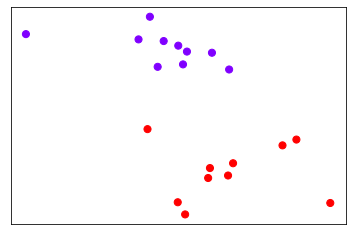

In [4]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap="rainbow")
plt.xticks([])
plt.yticks([])
plt.show()

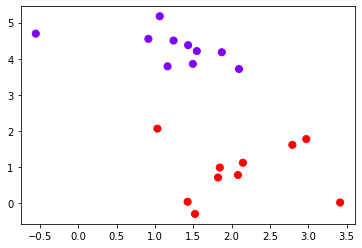

In [5]:
# 画决策边界 contour

# 获取当前子图，如果不存在，则创建新的子图
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap="rainbow")
ax = plt.gca()

In [6]:
# 两条坐标轴的最大值和最小值
xlim = ax.get_xlim()
ylim = ax.get_ylim()
print(xlim)
print(ylim)

(-0.754156016292922, 3.6157525011644123)
(-0.5641725036275491, 5.449709714257305)


In [7]:
axisx = np.linspace(xlim[0], xlim[1], 30)
axisy = np.linspace(ylim[0], ylim[1], 30)

In [8]:
axisy, axisx = np.meshgrid(axisy, axisx)

In [9]:
xy = np.vstack([axisx.ravel(), axisy.ravel()]).T

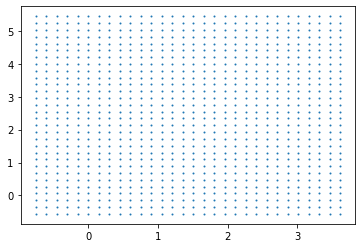

In [10]:
plt.scatter(xy[:, 0], xy[:, 1], s=1, cmap="rainbow")

In [11]:
# 理解 meshgrid 和 vstack
a = np.array([1, 2, 3])
b = np.array([1, 2, 3])
v1, v2 = np.meshgrid(a, b)
print(v1)
print(v2)

[[1 2 3]
 [1 2 3]
 [1 2 3]]
[[1 1 1]
 [2 2 2]
 [3 3 3]]


In [12]:
# 拉平，堆叠
v = np.vstack([v1.ravel(), v2.ravel()]).T
print(v)

[[1 1]
 [2 1]
 [3 1]
 [1 2]
 [2 2]
 [3 2]
 [1 3]
 [2 3]
 [3 3]]


In [13]:
print(v1.ravel())

[1 2 3 1 2 3 1 2 3]


In [14]:
# 建模，计算决策边界并找出网格上每个点到决策边界的距离
clf = SVC(kernel = "linear").fit(X, y)

In [15]:
# 每个输入样本点到决策边界的距离
Z = clf.decision_function(xy).reshape(axisx.shape)

In [16]:
Z.shape

(30, 30)

(-0.5641725036275491, 5.449709714257305)

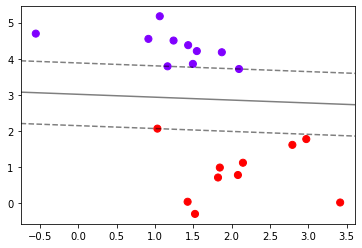

In [17]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap="rainbow")
ax = plt.gca()

ax.contour(axisx, axisy, Z, colors="k"
           ,levels=[-1, 0, 1] # 画 3 条等高线
           ,alpha=0.5
           ,linestyles=["--", "-", "--"]
          )
ax.set_xlim(xlim)
ax.set_ylim(ylim)

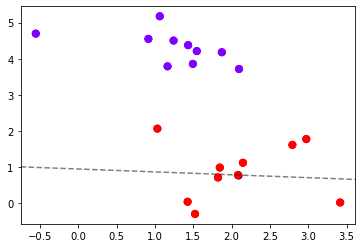

In [18]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap="rainbow")
plt.scatter(X[10, 0], X[10, 1], c="black", s=50, cmap="rainbow")

P = clf.decision_function(X[10].reshape(1, 2))
P

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap="rainbow")
ax = plt.gca()

ax.contour(axisx, axisy, Z
           ,colors="k"
           ,levels=[2.38252203]
           ,alpha=0.5
           ,linestyles=["--"]
          )


In [19]:
X.shape

(20, 2)

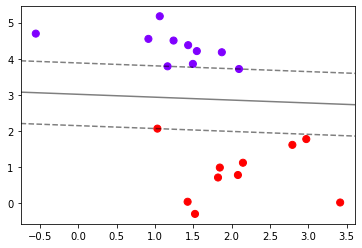

In [20]:
#将上述过程包装成函数:
def plot_svc_decision_function(model,ax=None):
    if ax is None:
        ax = plt.gca()

    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    x = np.linspace(xlim[0],xlim[1],30)
    y = np.linspace(ylim[0],ylim[1],30)
    Y,X = np.meshgrid(y,x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    ax.contour(X, Y, P,colors="k",levels=[-1,0,1],alpha=0.5,linestyles=["--","-","--"])
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

#则整个绘图过程可以写作:
clf = SVC(kernel = "linear").fit(X,y)
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap="rainbow")
plot_svc_decision_function(clf)

In [21]:
# 探索建好的模型

# 对样本分类
clf.predict(X)

array([0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0])

In [22]:
# 测试数据和标签的平均准确度
clf.score(X, y)

1.0

In [23]:
clf.support_vectors_

array([[1.1641107 , 3.79132988],
       [2.09680487, 3.7174206 ],
       [1.03150541, 2.0681289 ]])

In [24]:
clf.n_support_

array([2, 1], dtype=int32)

In [25]:
# 推广到非线性

from sklearn.datasets import make_circles

# 画出两个环
X, y = make_circles(100, factor=0.1, noise=0.1)

In [26]:
X.shape

(100, 2)

In [27]:
y.shape

(100,)

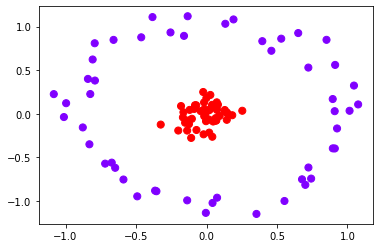

In [28]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap="rainbow")
plt.show()

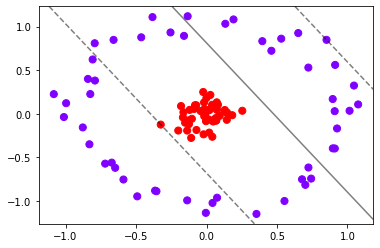

In [29]:
clf = SVC(kernel="linear").fit(X, y)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap="rainbow")
plot_svc_decision_function(clf)

In [30]:
# 在原本的 X 和 y 基础上，添加一个维度 r
r = np.exp(-(X**2).sum(1))
r.shape

(100,)

In [31]:
rlim = np.linspace(min(r), max(r), 100)
rlim

array([0.23578704, 0.24349836, 0.25120967, 0.25892099, 0.26663231,
       0.27434363, 0.28205495, 0.28976626, 0.29747758, 0.3051889 ,
       0.31290022, 0.32061154, 0.32832285, 0.33603417, 0.34374549,
       0.35145681, 0.35916813, 0.36687944, 0.37459076, 0.38230208,
       0.3900134 , 0.39772472, 0.40543603, 0.41314735, 0.42085867,
       0.42856999, 0.43628131, 0.44399262, 0.45170394, 0.45941526,
       0.46712658, 0.4748379 , 0.48254921, 0.49026053, 0.49797185,
       0.50568317, 0.51339449, 0.5211058 , 0.52881712, 0.53652844,
       0.54423976, 0.55195108, 0.55966239, 0.56737371, 0.57508503,
       0.58279635, 0.59050767, 0.59821898, 0.6059303 , 0.61364162,
       0.62135294, 0.62906426, 0.63677558, 0.64448689, 0.65219821,
       0.65990953, 0.66762085, 0.67533217, 0.68304348, 0.6907548 ,
       0.69846612, 0.70617744, 0.71388876, 0.72160007, 0.72931139,
       0.73702271, 0.74473403, 0.75244535, 0.76015666, 0.76786798,
       0.7755793 , 0.78329062, 0.79100194, 0.79871325, 0.80642

In [32]:
from mpl_toolkits import mplot3d

def plot_3D(elev=30, azim=30, X=X, y=y):
    ax = plt.subplot(projection="3d")
    # 与二维的唯一区别是 r
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap="rainbow")
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("z")
    plt.show()

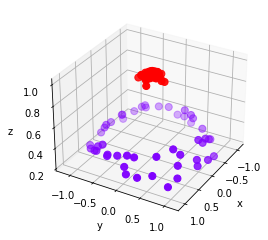

In [33]:
plot_3D()

In [34]:
# 非线性 SVM 与核函数
clf = SVC(kernel="rbf").fit(X, y)

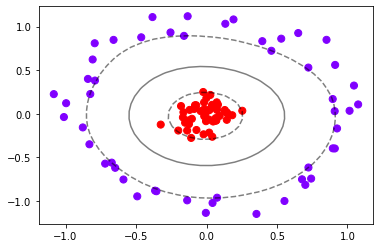

In [35]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap="rainbow")
plot_svc_decision_function(clf)

In [36]:
# 探索核函数在不同数据集上的表现

from matplotlib.colors import ListedColormap
from sklearn.datasets import make_circles, make_moons, make_blobs, make_classification
from sklearn import svm

In [37]:
n_samples = 100

In [38]:
datasets = [
    make_moons(n_samples=n_samples, noise=0.2, random_state=0)
    ,make_circles(n_samples=n_samples, noise=0.2, factor=0.5, random_state=1)
    ,make_blobs(n_samples=n_samples, centers=2, random_state=5)
    ,make_classification(n_samples=n_samples, n_features=2, n_informative=2, n_redundant=0, random_state=5)
]

In [39]:
Kernel = ["linear", "poly", "rbf", "sigmoid"]

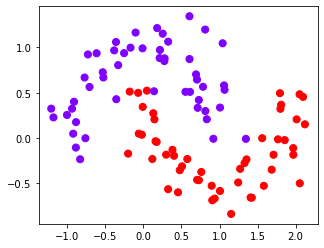

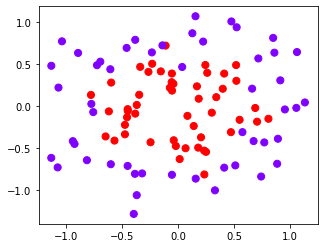

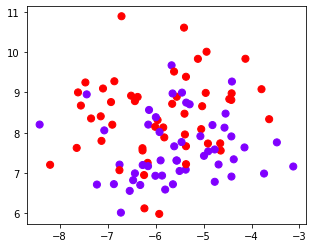

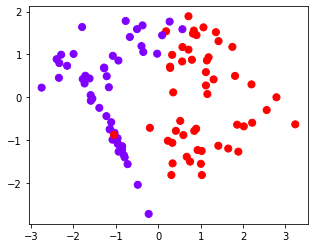

In [40]:
for X, Y in datasets:
    plt.figure(figsize=(5, 4))
    plt.scatter(X[:, 0], X[:, 1], c=Y, s=50, cmap="rainbow")

In [41]:

nrows=len(datasets)
ncols=len(Kernel) + 1

/home/ppp/anaconda3/envs/python-3.6/lib/python3.6/site-packages/ipykernel_launcher.py:38: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
/home/ppp/anaconda3/envs/python-3.6/lib/python3.6/site-packages/ipykernel_launcher.py:38: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
/home/ppp/anaconda3/envs/python-3.6/lib/python3.6/site-packages/ipykernel_launcher.py:38: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated si

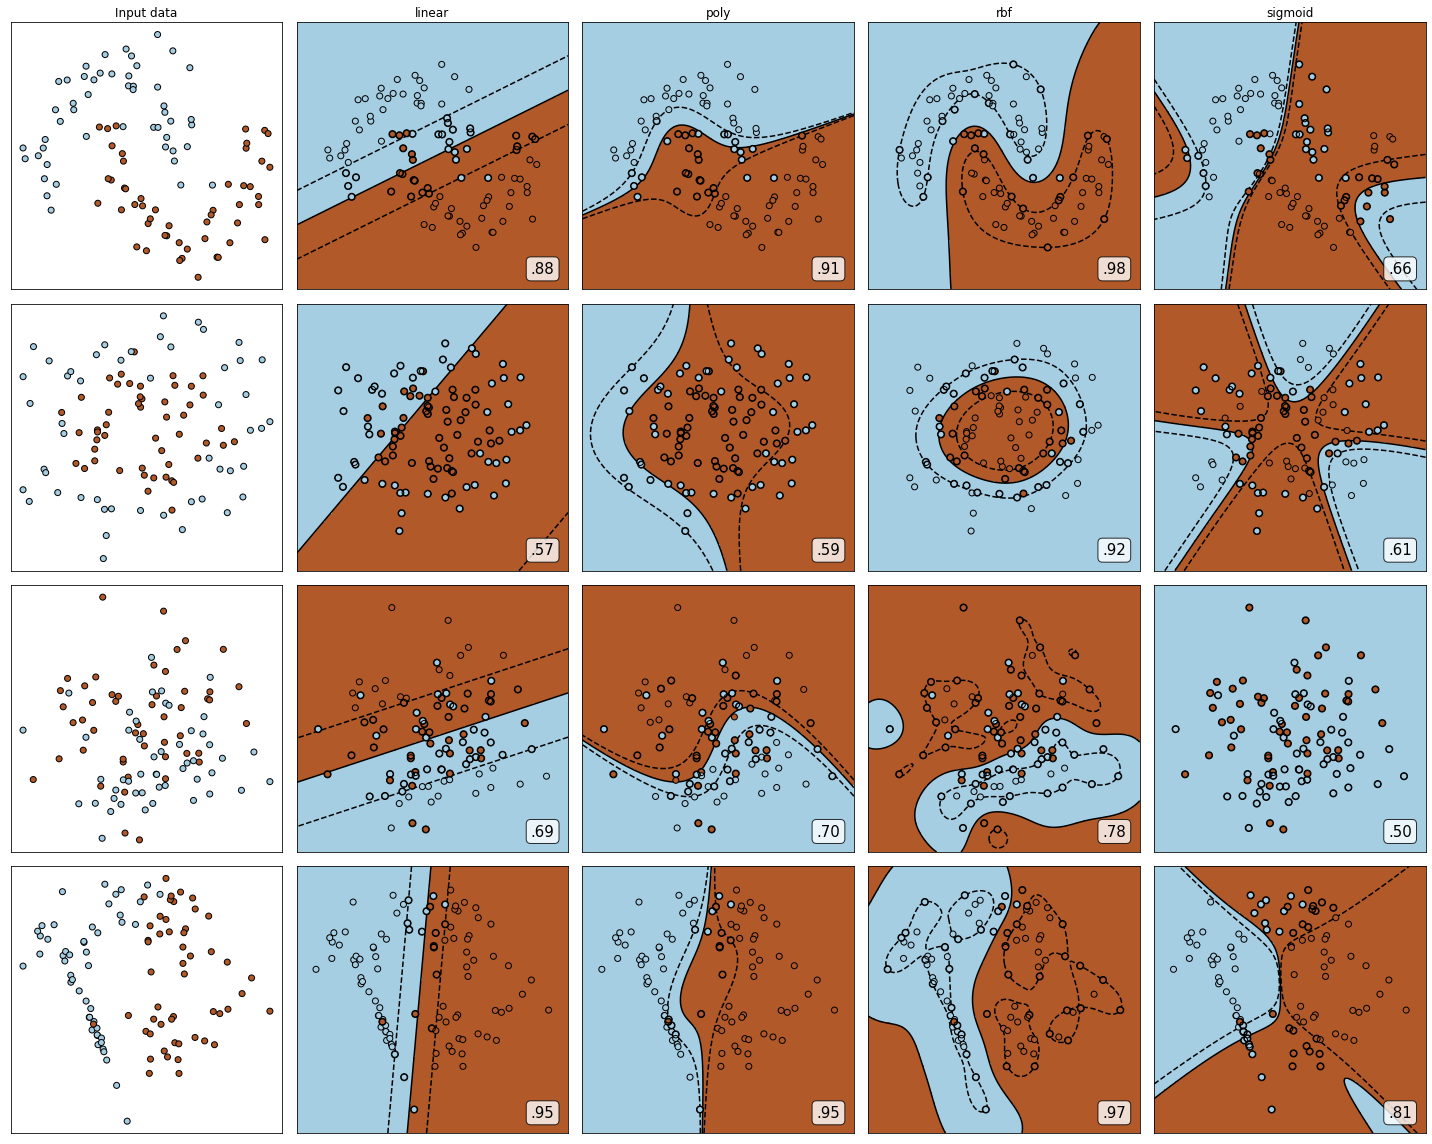

In [42]:

fig, axes = plt.subplots(nrows, ncols, figsize=(20, 16))

for ds_cnt, (X, Y) in enumerate(datasets):
    ax = axes[ds_cnt, 0]
    if(ds_cnt == 0):
        ax.set_title("Input data")
    ax.scatter(X[:, 0], X[:, 1], c=Y, zorder=10, cmap=plt.cm.Paired, edgecolors="k")
    ax.set_xticks(())
    ax.set_yticks(())
    
    for est_idx, kernel in enumerate(Kernel):
        # 定义子图位置
        ax = axes[ds_cnt, est_idx + 1]
        
        clf = svm.SVC(kernel=kernel, gamma=2).fit(X, Y)
        score = clf.score(X, Y)
        
        # 图像本身分布的散点图
        ax.scatter(X[:, 0], X[:, 1], c=Y
                   , zorder=10, 
                   cmap=plt.cm.Paired, edgecolors="k"
                  )
        
        # 支持向量
        ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=50,
                  facecolors="none", zorder=10, edgecolors="k")
        
        # 决策边界
        x_min, x_max = X[:, 0].min() - 0.5 , X[:, 0].max() + 0.5
        y_min, y_max = X[:, 1].min() - 0.5 , X[:, 1].max() + 0.5
        
        # np.mgrid 为 np.linspace 和 np.meshgrid 的合并
        XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
        # np.c_ 类似于 np.vstack
        Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()]).reshape(XX.shape)
        
        # 填充等高线不同区域的颜色
        ax.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
        
        # 绘制等高线
        ax.contour(XX, YY, Z, colors=["k", "k", "k"], linestyles=["--", "-", "--"]
                  ,levels=[-1, 0, 1])
        
        # 设定坐标轴不显示
        ax.set_xticks(())
        ax.set_yticks(())
        
        # 将标题放第一行
        if ds_cnt == 0:
            ax.set_title(kernel)
            
        # 添加分类的分数
        ax.text(0.95, 0.06, ("{:.2f}".format(score)).lstrip('0')
                ,size=15
                ,bbox=dict(boxstyle="round", alpha=0.8, facecolor="white")
                ,transform=ax.transAxes
                ,horizontalalignment="right"
               )
        
plt.tight_layout()
plt.show()

In [43]:
# rbf 和 poly 的弊端

from sklearn.datasets import load_breast_cancer
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from time import time
import datetime

In [44]:
data = load_breast_cancer()

X = data.data
y = data.target

In [45]:
X.shape

(569, 30)

In [46]:
np.unique(y)

array([0, 1])

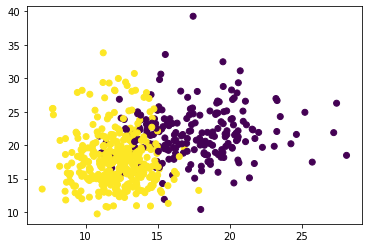

In [47]:
plt.scatter(X[:, 0], X[:, 1], c=y)

In [48]:
from sklearn.decomposition import PCA

In [49]:
X_dr = PCA(2).fit_transform(X)

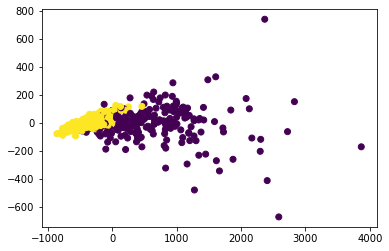

In [50]:
plt.scatter(X_dr[:, 0], X_dr[:, 1], c=y)

In [51]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, y, test_size=0.3, random_state=420)

In [55]:
Kernel = ["linear", "poly","rbf", "sigmoid"]

In [56]:
    
for kernel in Kernel:
    time0 = time()
    clf = SVC(kernel=kernel
              ,gamma="auto"
              ,degree=1 # 多项式核限定次数，高次计算很慢
              ,cache_size=5000 # 默认 200MB
             ).fit(Xtrain, Ytrain)
    print("The accuracy under kernel {} is {}".format(kernel, clf.score(Xtest, Ytest)))
    print(datetime.datetime.fromtimestamp(time() - time0).strftime("%M:%s:%f"))

The accuracy under kernel linear is 0.9298245614035088
00:0:227774
The accuracy under kernel poly is 0.9239766081871345
00:0:027666
The accuracy under kernel rbf is 0.5964912280701754
00:0:010130
The accuracy under kernel sigmoid is 0.5964912280701754
00:0:004750


In [57]:
# 无量纲化
import pandas as pd
data = pd.DataFrame(X)
data.describe([0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.99]).T


,count,mean,std,min,1%,5%,10%,25%,50%,75%,99%,max
0,569.0,14.127292,3.524049,6.981000,8.458360,9.529200,10.260000,11.700000,13.370000,15.780000,24.371600,28.11000
1,569.0,19.289649,4.301036,9.710000,10.930400,13.088000,14.078000,16.170000,18.840000,21.800000,30.652000,39.28000
2,569.0,91.969033,24.298981,43.790000,53.827600,60.496000,65.830000,75.170000,86.240000,104.100000,165.724000,188.50000
3,569.0,654.889104,351.914129,143.500000,215.664000,275.780000,321.600000,420.300000,551.100000,782.700000,1786.600000,2501.00000
4,569.0,0.096360,0.014064,0.052630,0.068654,0.075042,0.079654,0.086370,0.095870,0.105300,0.132888,0.16340
5,569.0,0.104341,0.052813,0.019380,0.033351,0.040660,0.049700,0.064920,0.092630,0.130400,0.277192,0.34540
6,569.0,0.088799,0.079720,0.000000,0.000000,0.004983,0.013686,0.029560,0.061540,0.130700,0.351688,0.42680
7,569.0,0.048919,0.038803,0.000000,0.000000,0.005621,0.011158,0.020310,0.033500,0.074000,0.164208,0.20120
8,569.0,0.181162,0.027414,0.106000,0.129508,0.141500,0.149580,0.161900,0.179200,0.195700,0.259564,0.30400
9,569.0,0.062798,0.007060,0.049960,0.051504,0.053926,0.055338,0.057700,0.061540,0.066120,0.085438,0.09744


In [58]:
# 严重的量纲不统一，用标准化处理

from sklearn.preprocessing import StandardScaler

X = StandardScaler().fit_transform(X)

data = pd.DataFrame(X)
data.describe([0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.99]).T

,count,mean,std,min,1%,5%,10%,25%,50%,75%,99%,max
0,569.0,-3.153111e-15,1.00088,-2.029648,-1.610057,-1.305923,-1.098366,-0.689385,-0.215082,0.469393,2.909529,3.971288
1,569.0,-6.568462e-15,1.00088,-2.229249,-1.945253,-1.443165,-1.212786,-0.725963,-0.104636,0.584176,2.644095,4.651889
2,569.0,-6.993039e-16,1.00088,-1.984504,-1.571053,-1.296381,-1.076672,-0.691956,-0.235980,0.499677,3.037982,3.976130
3,569.0,-8.553985e-16,1.00088,-1.454443,-1.249201,-1.078225,-0.947908,-0.667195,-0.295187,0.363507,3.218702,5.250529
4,569.0,6.081447e-15,1.00088,-3.112085,-1.971730,-1.517125,-1.188910,-0.710963,-0.034891,0.636199,2.599511,4.770911
5,569.0,-1.136369e-15,1.00088,-1.610136,-1.345369,-1.206849,-1.035527,-0.747086,-0.221940,0.493857,3.275782,4.568425
6,569.0,-2.997017e-16,1.00088,-1.114873,-1.114873,-1.052316,-0.943046,-0.743748,-0.342240,0.526062,3.300560,4.243589
7,569.0,1.023981e-15,1.00088,-1.261820,-1.261820,-1.116837,-0.974010,-0.737944,-0.397721,0.646935,2.973759,3.927930
8,569.0,-1.860648e-15,1.00088,-2.744117,-1.885853,-1.448032,-1.153036,-0.703240,-0.071627,0.530779,2.862418,4.484751
9,569.0,-1.504752e-15,1.00088,-1.819865,-1.600987,-1.257643,-1.057477,-0.722639,-0.178279,0.470983,3.209454,4.910919


In [59]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, y, test_size=0.3, random_state=420)

for kernel in Kernel:
    time0 = time()
    clf = SVC(kernel=kernel
              ,gamma="auto"
              ,degree=1 # 多项式核限定次数，高次计算很慢
              ,cache_size=5000 # 默认 200MB
             ).fit(Xtrain, Ytrain)
    print("The accuracy under kernel {} is {}".format(kernel, clf.score(Xtest, Ytest)))
    print(datetime.datetime.fromtimestamp(time() - time0).strftime("%M:%s:%f"))
    

The accuracy under kernel linear is 0.9766081871345029
00:0:002481
The accuracy under kernel poly is 0.9649122807017544
00:0:002494
The accuracy under kernel rbf is 0.9707602339181286
00:0:003867
The accuracy under kernel sigmoid is 0.9532163742690059
00:0:003296


0.9766081871345029 0.012067926406393264


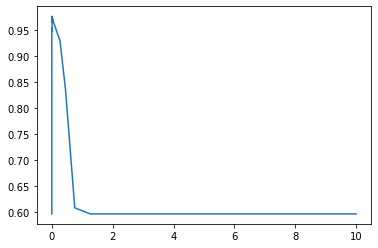

In [61]:
# 调参非线性核

# rbf 有一个参数，用学习曲线
score = []
gamma_range = np.logspace(-10, 1, 50) # 对数刻度上均匀的数字
for i in gamma_range:
    clf = SVC(kernel="rbf", gamma=i, cache_size=5000).fit(Xtrain, Ytrain)
    score.append(clf.score(Xtest, Ytest))

print(max(score), gamma_range[score.index(max(score))])
plt.plot(gamma_range, score)
plt.show()

In [65]:
# 多项式核有3各参数，用网格搜索

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV

time0 = time()
gamma_range = np.logspace(-10, 1, 20)
coef0_range = np.linspace(0, 5, 10)

param_grid = dict(gamma = gamma_range
                  ,coef0 = coef0_range
                 )

cv = StratifiedShuffleSplit(n_splits=5, test_size=0.3, random_state=420)
grid = GridSearchCV(SVC(kernel="poly", degree=1, cache_size=5000)
                    ,param_grid=param_grid
                    ,cv=cv
                   )
grid.fit(X, y)

print("The beset parameters are {} with a score of {:0.5f}".format(grid.best_params_, grid.best_score_))
print(datetime.datetime.fromtimestamp(time() - time0).strftime("%M:%s:%f"))

The beset parameters are {'coef0': 0.0, 'gamma': 0.18329807108324375} with a score of 0.96959
00:4:337035


0.9766081871345029 1.2340816326530613


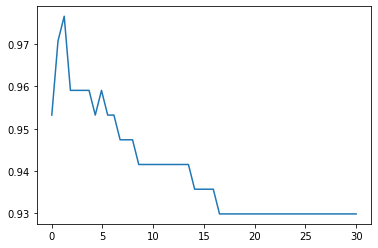

In [67]:
# linear
score = []
C_range = np.linspace(0.01, 30, 50)

for i in C_range:
    clf = SVC(kernel="linear", C=i, cache_size=5000).fit(Xtrain, Ytrain)
    score.append(clf.score(Xtest, Ytest))
    
print(max(score), C_range[score.index(max(score))])
plt.plot(C_range, score)
plt.show()

0.9824561403508771 6.7424489795918365


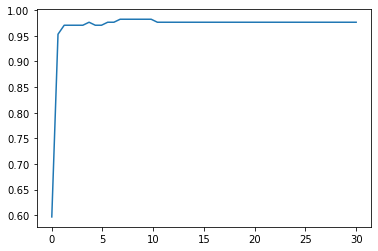

In [71]:
# rbf

score = []
C_range =  np.linspace(0.01, 30, 50)
for i in C_range:
    clf = SVC(kernel="rbf", C=i, gamma=0.012067926406393264, cache_size=5000).fit(Xtrain, Ytrain)
    score.append(clf.score(Xtest, Ytest))

print(max(score), C_range[score.index(max(score))])
plt.plot(C_range, score)
plt.show()

0.9824561403508771 0.9824561403508771


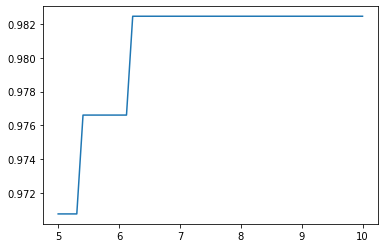

In [72]:
# rbf, 细粒度

score = []
C_range =  np.linspace(5, 10, 50)
for i in C_range:
    clf = SVC(kernel="rbf", C=i, gamma=0.012067926406393264, cache_size=5000).fit(Xtrain, Ytrain)
    score.append(clf.score(Xtest, Ytest))

print(max(score), score[score.index(max(score))])
plt.plot(C_range, score)
plt.show()

/home/ppp/anaconda3/envs/python-3.6/lib/python3.6/site-packages/ipykernel_launcher.py:60: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
/home/ppp/anaconda3/envs/python-3.6/lib/python3.6/site-packages/ipykernel_launcher.py:60: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
/home/ppp/anaconda3/envs/python-3.6/lib/python3.6/site-packages/ipykernel_launcher.py:60: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated si

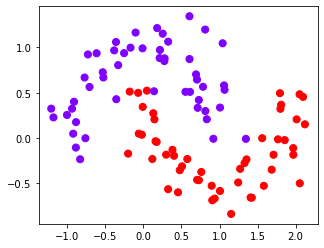

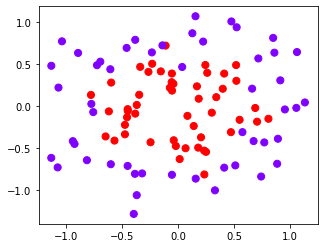

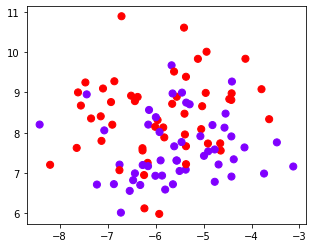

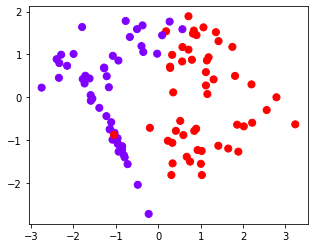

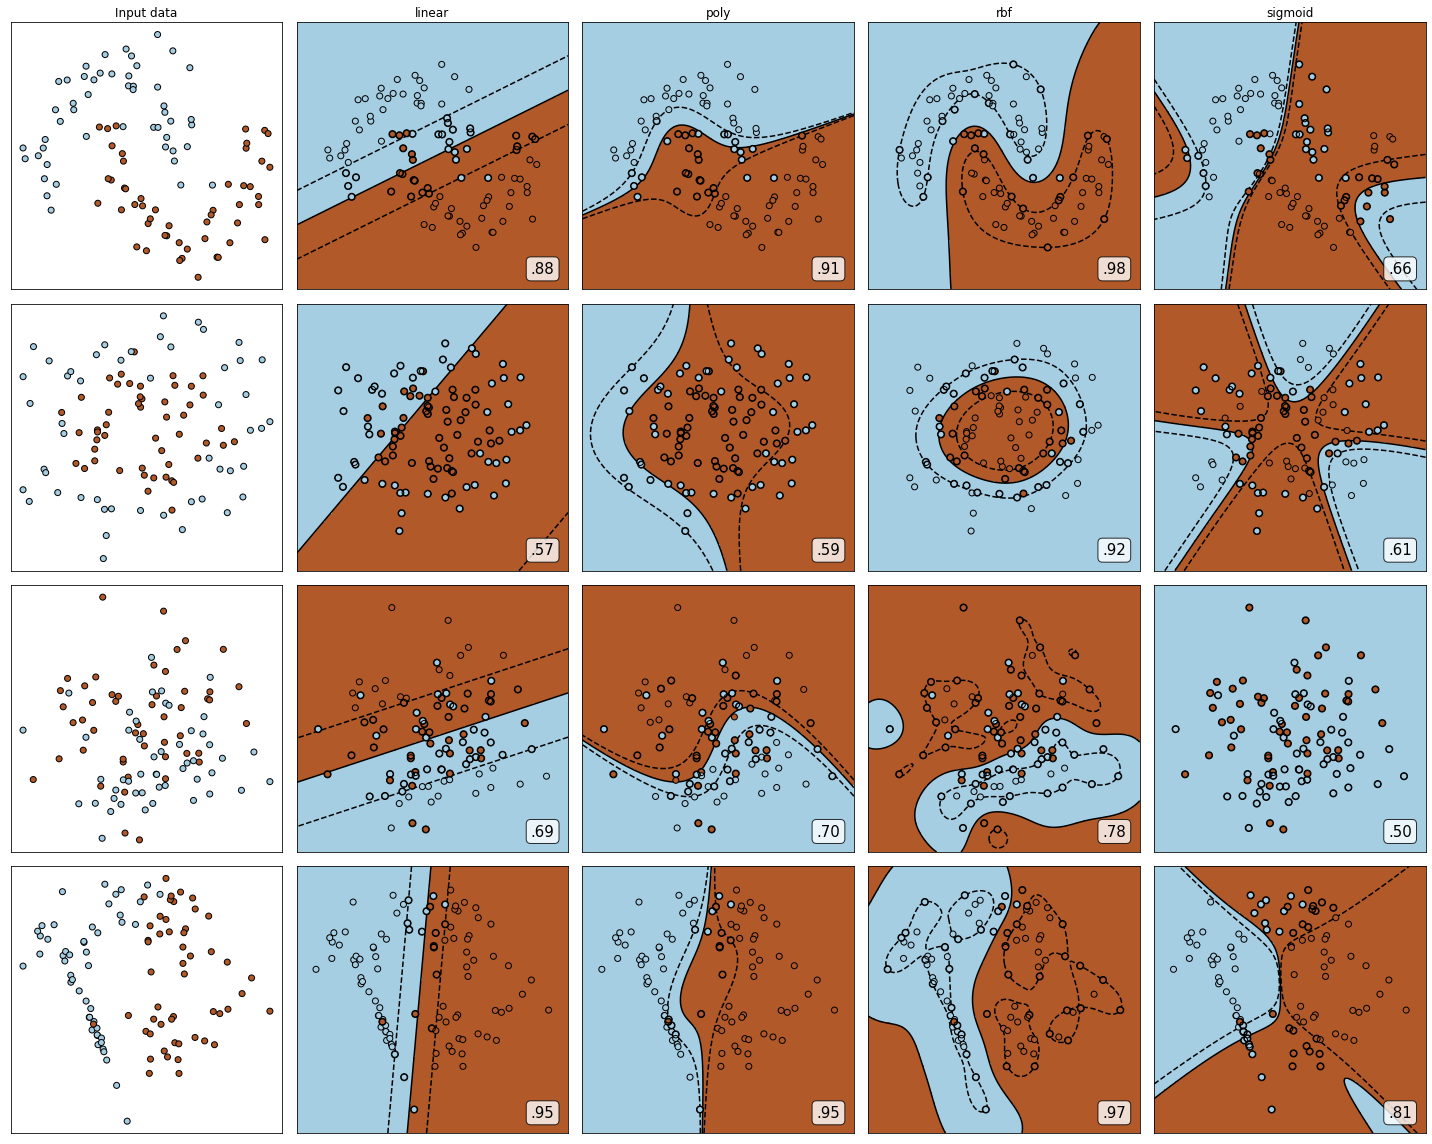

In [73]:
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_circles, make_moons, make_blobs, make_classification
from sklearn import svm

n_samples = 100

datasets = [
    make_moons(n_samples=n_samples, noise=0.2, random_state=0)
    ,make_circles(n_samples=n_samples, noise=0.2, factor=0.5, random_state=1)
    ,make_blobs(n_samples=n_samples, centers=2, random_state=5)
    ,make_classification(n_samples=n_samples, n_features=2, n_informative=2, n_redundant=0, random_state=5)
]

Kernel = ["linear", "poly", "rbf", "sigmoid"]

for X, Y in datasets:
    plt.figure(figsize=(5, 4))
    plt.scatter(X[:, 0], X[:, 1], c=Y, s=50, cmap="rainbow")
    
nrows=len(datasets)
ncols=len(Kernel) + 1

fig, axes = plt.subplots(nrows, ncols, figsize=(20, 16))

for ds_cnt, (X, Y) in enumerate(datasets):
    ax = axes[ds_cnt, 0]
    if(ds_cnt == 0):
        ax.set_title("Input data")
    ax.scatter(X[:, 0], X[:, 1], c=Y, zorder=10, cmap=plt.cm.Paired, edgecolors="k")
    ax.set_xticks(())
    ax.set_yticks(())
    
    for est_idx, kernel in enumerate(Kernel):
        # 定义子图位置
        ax = axes[ds_cnt, est_idx + 1]
        
        clf = svm.SVC(kernel=kernel, gamma=2).fit(X, Y)
        score = clf.score(X, Y)
        
        # 图像本身分布的散点图
        ax.scatter(X[:, 0], X[:, 1], c=Y
                   , zorder=10, 
                   cmap=plt.cm.Paired, edgecolors="k"
                  )
        
        # 支持向量
        ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=50,
                  facecolors="none", zorder=10, edgecolors="k")
        
        # 决策边界
        x_min, x_max = X[:, 0].min() - 0.5 , X[:, 0].max() + 0.5
        y_min, y_max = X[:, 1].min() - 0.5 , X[:, 1].max() + 0.5
        
        # np.mgrid 为 np.linspace 和 np.meshgrid 的合并
        XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
        # np.c_ 类似于 np.vstack
        Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()]).reshape(XX.shape)
        
        # 填充等高线不同区域的颜色
        ax.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
        
        # 绘制等高线
        ax.contour(XX, YY, Z, colors=["k", "k", "k"], linestyles=["--", "-", "--"]
                  ,levels=[-1, 0, 1])
        
        # 设定坐标轴不显示
        ax.set_xticks(())
        ax.set_yticks(())
        
        # 将标题放第一行
        if ds_cnt == 0:
            ax.set_title(kernel)
            
        # 添加分类的分数
        ax.text(0.95, 0.06, ("{:.2f}".format(score)).lstrip('0')
                ,size=15
                ,bbox=dict(boxstyle="round", alpha=0.8, facecolor="white")
                ,transform=ax.transAxes
                ,horizontalalignment="right"
               )
        
plt.tight_layout()
plt.show()

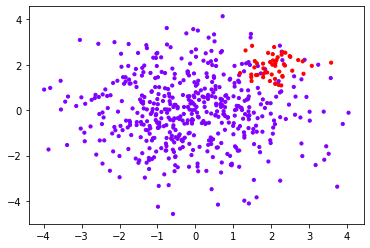

In [74]:
# 样本不均衡

class_1 = 500
class_2 = 50

centers = [[0.0, 0.0], [2.0, 2.0]] # 两个类别的中心
clusters_std = [1.5, 0.5]

X, y = make_blobs(n_samples=[class_1, class_2]
                  ,centers=centers
                  ,cluster_std=clusters_std
                  ,random_state=0
                  ,shuffle=False
                 )

plt.scatter(X[:,0], X[:, 1], c=y, cmap="rainbow", s=10)



In [75]:
clf = SVC(kernel="linear", C=1.0)
clf.fit(X, y)

SVC(kernel='linear')

In [76]:
wclf = SVC(kernel="linear", class_weight={1:10})
wclf.fit(X, y)

SVC(class_weight={1: 10}, kernel='linear')

In [77]:
clf.score(X, y)

0.9418181818181818

In [78]:
wclf.score(X, y)

0.9127272727272727

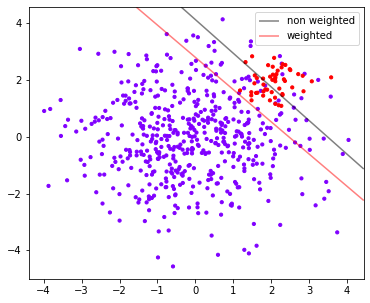

In [79]:
plt.figure(figsize=(6, 5))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="rainbow", s=10)
ax = plt.gca()

xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T

Z_clf = clf.decision_function(xy).reshape(XX.shape)
a = ax.contour(XX, YY, Z_clf, colors="black", levels=[0], alpha=0.5, linestyles=["-"])

Z_wclf = wclf.decision_function(xy).reshape(XX.shape)
b = ax.contour(XX, YY, Z_wclf, colors="red", levels=[0], alpha=0.5, linestyles=["-"])

plt.legend([a.collections[0], b.collections[0]], ["non weighted", "weighted"], loc="upper right")
plt.show()

In [80]:
# 精度
(y[y == clf.predict(X)] == 1).sum() / (clf.predict(X) == 1).sum()

0.7142857142857143

In [81]:
(y[y == wclf.predict(X)] == 1).sum() / (wclf.predict(X) == 1).sum()

0.5102040816326531

In [82]:
# 召回率
(y[y == clf.predict(X)].sum()) / (y == 1).sum()

0.6

In [83]:
(y[y == wclf.predict(X)].sum()) / (y == 1).sum()

1.0

In [85]:
# 特异度
(y[y == clf.predict(X)] == 0).sum() / (y == 0).sum()

0.976

In [86]:
(y[y == wclf.predict(X)] == 0).sum() / (y == 0).sum()

0.904

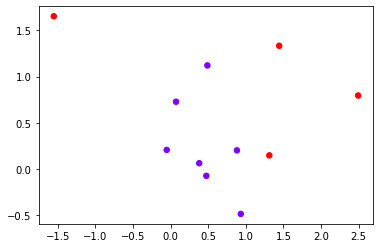

In [88]:
# 概率与阈值

class_1_ = 7
class_2_ = 4

centers_ = [[0.0, 0.0], [1, 1]]
clusters_std = [0.5, 1]

X_, y_ = make_blobs(n_samples=[class_1_, class_2_]
                    ,centers=centers_
                    ,cluster_std=clusters_std
                    ,random_state=0
                    ,shuffle=False
                   )
plt.scatter(X_[:, 0], X_[:, 1], c=y_, s=30, cmap="rainbow")

In [109]:
from sklearn.linear_model import LogisticRegression as LR

clf_lr = LR().fit(X_, y_)
prob = clf_lr.predict_proba(X_)

In [110]:
# 将样本和概率放到一个 DataFrame
prob = pd.DataFrame(prob)

prob.columns = ["0", '1']
prob

,0,1
0,0.694619,0.305381
1,0.510931,0.489069
2,0.820038,0.179962
3,0.785647,0.214353
4,0.777387,0.222613
5,0.656634,0.343366
6,0.768586,0.231414
7,0.349171,0.650829
8,0.366184,0.633816
9,0.663272,0.336728


In [111]:
# 建模，调用概率, 阈值 0.5

for i in range(prob.shape[0]):
    if prob.loc[i, "1"] > 0.5:
        prob.loc[i, "pred"] = 1
    else:
        prob.loc[i, "pred"] = 0
        
prob

,0,1,pred
0,0.694619,0.305381,0.0
1,0.510931,0.489069,0.0
2,0.820038,0.179962,0.0
3,0.785647,0.214353,0.0
4,0.777387,0.222613,0.0
5,0.656634,0.343366,0.0
6,0.768586,0.231414,0.0
7,0.349171,0.650829,1.0
8,0.366184,0.633816,1.0
9,0.663272,0.336728,0.0


In [112]:
prob["y_true"] = y_

prob = prob.sort_values(by="1", ascending=False)

prob


,0,1,pred,y_true
7,0.349171,0.650829,1.0,1
8,0.366184,0.633816,1.0,1
1,0.510931,0.489069,0.0,0
10,0.607529,0.392471,0.0,1
5,0.656634,0.343366,0.0,0
9,0.663272,0.336728,0.0,1
0,0.694619,0.305381,0.0,0
6,0.768586,0.231414,0.0,0
4,0.777387,0.222613,0.0,0
3,0.785647,0.214353,0.0,0


In [113]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score
confusion_matrix(prob.loc[:, "y_true"], prob.loc[:, "pred"], labels=[1, 0])

array([[2, 2],
       [0, 7]])

In [114]:
print(precision_score(prob.loc[:, "y_true"], prob.loc[:, "pred"], labels=[1, 0]))
print(recall_score(prob.loc[:, "y_true"], prob.loc[:, "pred"], labels=[1, 0]))

1.0
0.5


In [115]:
# 使用阈值 0.54

for i in range(prob.shape[0]):
    if prob.loc[i, "1"] > 0.4:
        prob.loc[i, "pred"] = 1
    else:
        prob.loc[i, "pred"] = 0
        
prob = prob.sort_values(by="1", ascending=False)

prob

,0,1,pred,y_true
7,0.349171,0.650829,1.0,1
8,0.366184,0.633816,1.0,1
1,0.510931,0.489069,1.0,0
10,0.607529,0.392471,0.0,1
5,0.656634,0.343366,0.0,0
9,0.663272,0.336728,0.0,1
0,0.694619,0.305381,0.0,0
6,0.768586,0.231414,0.0,0
4,0.777387,0.222613,0.0,0
3,0.785647,0.214353,0.0,0


In [116]:
confusion_matrix(prob.loc[:, "y_true"], prob.loc[:, "pred"], labels=[1, 0])

array([[2, 2],
       [1, 6]])

In [117]:
precision_score(prob.loc[:, "y_true"], prob.loc[:, "pred"], labels=[1, 0])

0.6666666666666666

In [118]:
recall_score(prob.loc[:, "y_true"], prob.loc[:, "pred"], labels=[1, 0])

0.5

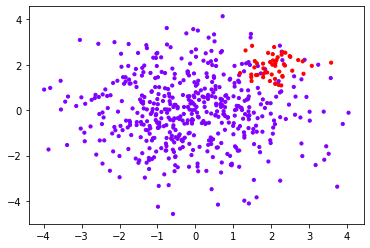

In [119]:
# 用 SVM 做概率预测

class_1 = 500
class_2 = 50

centers = [[0.0, 0.0], [2.0, 2.0]]
clusters_std = [1.5, 0.5]
X, y = make_blobs(n_samples=[class_1, class_2]
                  ,centers=centers
                  ,cluster_std=clusters_std
                  ,random_state=0
                  ,shuffle=False
                 )
plt.scatter(X[:, 0], X[:, 1]
            ,c=y
            ,cmap="rainbow"
            ,s=10
           )

In [120]:
clf_proba = SVC(kernel="linear", C=1.0, probability=True).fit(X, y)

In [122]:
clf_proba.predict_proba(X)

array([[0.69908898, 0.30091102],
       [0.27187426, 0.72812574],
       [0.96555691, 0.03444309],
       ...,
       [0.16092074, 0.83907926],
       [0.36482617, 0.63517383],
       [0.32599167, 0.67400833]])

In [123]:
clf_proba.predict_proba(X).shape

(550, 2)

In [124]:
clf_proba.decision_function(X)

array([ -0.39182241,   0.95617053,  -2.24996184,  -2.63659269,
        -3.65243197,  -1.67311996,  -2.56396417,  -2.80650393,
        -1.76184723,  -4.7948575 ,  -7.59061196,  -3.66174848,
        -2.2508023 ,  -4.27626526,   0.78571364,  -3.24751892,
        -8.57016271,  -4.45823747,  -0.14034183,  -5.20657114,
        -8.02181046,  -4.18420871,  -5.6222409 ,  -5.12602771,
        -7.22592707,  -5.07749638,  -6.72386021,  -3.4945225 ,
        -3.51475144,  -5.72941551,  -5.79160724,  -8.06232013,
        -4.36303857,  -6.25419679,  -5.59426696,  -2.60919281,
        -3.90887478,  -4.38754704,  -6.46432224,  -4.54279979,
        -4.78961735,  -5.53727469,   1.33920817,  -2.27766451,
        -4.39650854,  -2.97649872,  -2.26771979,  -2.40781748,
        -1.41638181,  -3.26142275,  -2.7712218 ,  -4.87288439,
        -3.2594128 ,  -5.91189118,   1.48676267,   0.5389064 ,
        -2.76188843,  -3.36126945,  -2.64697843,  -1.63635284,
        -5.04695135,  -1.59196902,  -5.5195418 ,  -2.10

In [137]:
clf_proba.decision_function(X).shape


(550,)

In [138]:
recall = []
FPR = []

probrange = np.linspace(clf_proba.predict_proba(X)[:, 1].min()
                        ,clf_proba.predict_proba(X)[:, 1].max()
                        ,num=50
                        ,endpoint=False
                       )

In [139]:
probrange

array([6.11965316e-07, 1.86803471e-02, 3.73600822e-02, 5.60398174e-02,
       7.47195525e-02, 9.33992876e-02, 1.12079023e-01, 1.30758758e-01,
       1.49438493e-01, 1.68118228e-01, 1.86797963e-01, 2.05477698e-01,
       2.24157434e-01, 2.42837169e-01, 2.61516904e-01, 2.80196639e-01,
       2.98876374e-01, 3.17556109e-01, 3.36235844e-01, 3.54915579e-01,
       3.73595315e-01, 3.92275050e-01, 4.10954785e-01, 4.29634520e-01,
       4.48314255e-01, 4.66993990e-01, 4.85673725e-01, 5.04353461e-01,
       5.23033196e-01, 5.41712931e-01, 5.60392666e-01, 5.79072401e-01,
       5.97752136e-01, 6.16431871e-01, 6.35111606e-01, 6.53791342e-01,
       6.72471077e-01, 6.91150812e-01, 7.09830547e-01, 7.28510282e-01,
       7.47190017e-01, 7.65869752e-01, 7.84549488e-01, 8.03229223e-01,
       8.21908958e-01, 8.40588693e-01, 8.59268428e-01, 8.77948163e-01,
       8.96627898e-01, 9.15307633e-01])

In [140]:

for i in probrange:
    y_predict = []
    for j in range(X.shape[0]):
        if clf_proba.predict_proba(X)[j, 1] > i:
            y_predict.append(1)
        else:
            y_predict.append(0)
        
    cm = confusion_matrix(y, y_predict, labels=[1, 0])
    
    recall.append(cm[0, 0] / cm[0, :].sum())
    FPR.append(cm[1, 0] / cm[1, :].sum())

In [141]:
recall.sort()
FPR.sort()

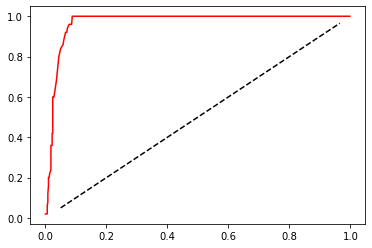

In [142]:
plt.plot(FPR, recall, c="red")
plt.plot(probrange+0.05, probrange+0.05, c="black", linestyle="--")
plt.show()

In [143]:
# AUC 面积

from sklearn.metrics import roc_auc_score, roc_curve

In [144]:
FPR, recall, thresholds = roc_curve(y, clf_proba.decision_function(X), pos_label=1)

In [145]:
FPR

array([0.   , 0.   , 0.006, 0.006, 0.008, 0.008, 0.01 , 0.01 , 0.014,
       0.014, 0.018, 0.018, 0.022, 0.022, 0.024, 0.024, 0.028, 0.028,
       0.03 , 0.03 , 0.032, 0.032, 0.036, 0.036, 0.04 , 0.04 , 0.042,
       0.042, 0.044, 0.044, 0.05 , 0.05 , 0.054, 0.054, 0.058, 0.058,
       0.066, 0.066, 0.072, 0.072, 0.074, 0.074, 0.086, 0.086, 1.   ])

In [146]:
recall

array([0.  , 0.02, 0.02, 0.06, 0.06, 0.16, 0.16, 0.2 , 0.2 , 0.22, 0.22,
       0.36, 0.36, 0.42, 0.42, 0.6 , 0.6 , 0.62, 0.62, 0.64, 0.64, 0.68,
       0.68, 0.7 , 0.7 , 0.74, 0.74, 0.76, 0.76, 0.82, 0.82, 0.84, 0.84,
       0.86, 0.86, 0.88, 0.88, 0.92, 0.92, 0.94, 0.94, 0.96, 0.96, 1.  ,
       1.  ])

In [147]:
thresholds

array([  3.18236076,   2.18236076,   1.48676267,   1.35964325,
         1.33920817,   1.14038015,   1.13383091,   1.00003406,
         0.85085628,   0.84476439,   0.78571364,   0.60568093,
         0.5389064 ,   0.46718521,   0.44396046,   0.03907036,
        -0.07011269,  -0.10668727,  -0.1258212 ,  -0.13845693,
        -0.14034183,  -0.16790648,  -0.2040958 ,  -0.22137683,
        -0.24381463,  -0.26762451,  -0.34446784,  -0.3467975 ,
        -0.39182241,  -0.40676459,  -0.4589064 ,  -0.46310299,
        -0.49195707,  -0.5088941 ,  -0.53560561,  -0.55152081,
        -0.62628865,  -0.67580418,  -0.78127198,  -0.79874442,
        -0.88438995,  -0.91257798,  -1.01417607,  -1.08601917,
       -10.31959605])

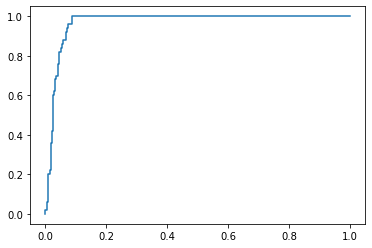

In [148]:
plt.plot(FPR, recall)
plt.show()

In [150]:
area = roc_auc_score(y, clf_proba.decision_function(X))
area

0.9696400000000001

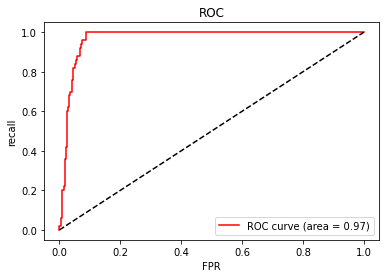

In [151]:
plt.figure()
plt.plot(FPR, recall, color='red',
         label='ROC curve (area = %0.2f)' % area)
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel("FPR")
plt.ylabel("recall")
plt.title("ROC")
plt.legend(loc="lower right")
plt.show()

In [152]:
# 找 recall 和 FPR 差距最大的点

maxindex = (recall - FPR).tolist().index(max(recall - FPR))
thresholds[maxindex]

-1.0860191749391461

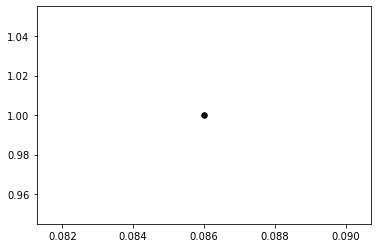

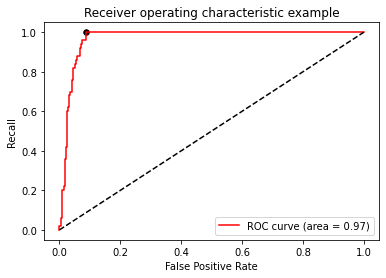

In [153]:
#我们可以在图像上来看看这个点在哪里
plt.scatter(FPR[maxindex],recall[maxindex],c="black",s=30)

#把上述代码放入这段代码中:
plt.figure()
plt.plot(FPR, recall, color='red',
         label='ROC curve (area = %0.2f)' % area)
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.scatter(FPR[maxindex],recall[maxindex],c="black",s=30)
plt.xlim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('Recall')
plt.title('Receiver operating characteristic example')
plt.ylim([-0.05, 1.05])
plt.legend(loc="lower right")
plt.show()